# Restaurants Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
foodhub_df= pd.read_csv('foodhub-order.csv')
foodhub_df.sample(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
414,1477620,148320,Tamarind TriBeCa,Indian,16.49,Weekday,Not given,31,28
752,1478389,68775,Sushi of Gari Tribeca,Japanese,12.13,Weekend,Not given,25,30
45,1476581,322162,The Meatball Shop,Italian,6.74,Weekend,5,29,23
1258,1476900,240014,Sarabeth's,American,32.93,Weekday,4,33,33
1099,1477780,303409,TAO,Japanese,12.18,Weekend,Not given,23,24


### **Question 1:** How many rows and columns are present in the data?

In [3]:
foodhub_shape=foodhub_df.shape
print('rows:',foodhub_shape[0],' and the columns are: ',foodhub_shape[1])

rows: 1898  and the columns are:  9


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [4]:
foodhub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. 

In [5]:
# Check if there are any missing or null values in the DataFrame
# Returns True if there are any missing values, False otherwise
print(foodhub_df.isnull().values.any())

False


In [6]:
# Count the missing or null values for each column in the DataFrame
missing_counts = foodhub_df.isna().sum()

# Print the missing value counts
print(missing_counts)


order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? 

In [7]:
# Calculate the descriptive statistics for the 'food_preparation_time' column
foodprep_desc = foodhub_df['food_preparation_time'].describe()

# Print the minimum, average, and maximum food preparation time
print('The min, avg, and max foodprep time are:', foodprep_desc[3], ',', foodprep_desc[1], 'and', foodprep_desc[7], 'respectively.')

The min, avg, and max foodprep time are: 20.0 , 27.371970495258168 and 35.0 respectively.


### **Question 5:** How many orders are not rated? 

In [8]:
# Filter the DataFrame to retrieve rows where 'rating' is 'Not given'
not_rated_orders = foodhub_df[foodhub_df['rating'] == 'Not given']

# Calculate the length of the resulting DataFrame to get the count of not rated orders
print(len(not_rated_orders), 'are not rated')

736 are not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) 

#### Order ID

In [9]:
 len(foodhub_df['order_id'])

1898

#### Customer ID

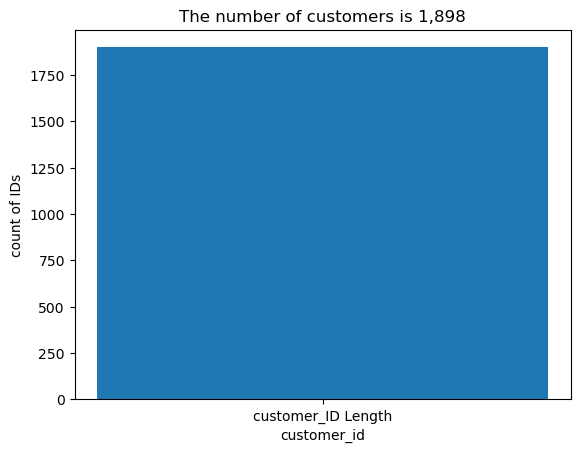

In [11]:
lenght_of_customerID = len(foodhub_df['customer_id'])

#### Restaurant name

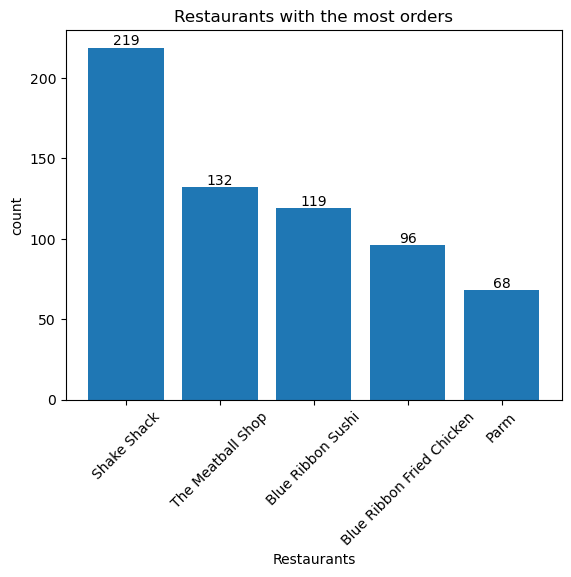

In [12]:
#restaurants with the most orders
Top_5_restaurants= foodhub_df['restaurant_name'].value_counts().head(5)

#Barchart to visualize the data
plt.bar(Top_5_restaurants.index,Top_5_restaurants.values)

# Set labels and title
plt.xlabel('Restaurants')
plt.ylabel('count')
plt.title('Restaurants with the most orders')
plt.xticks(rotation=45)

#to add data labels
for a, b in enumerate(Top_5_restaurants.values):
    plt.text(a, b, str(b), ha='center', va='bottom')

# Show the histogram
plt.show()

#### Cuisine type

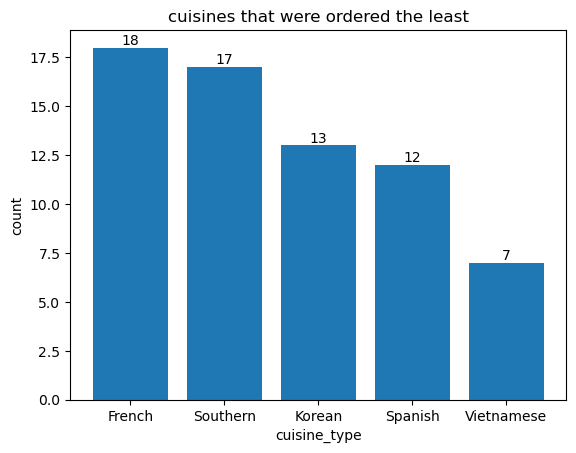

In [56]:
#counts of the 5 least ordered cuisines
bottom5_Cuisines= foodhub_df['cuisine_type'].value_counts().tail()

#visualize it
plt.bar(bottom5_Cuisines.index,bottom5_Cuisines.values)
plt.xlabel('cuisine_type')
plt.ylabel('count')
plt.title('cuisines that were ordered the least')

#to add data labels
for a, b in enumerate(bottom5_Cuisines.values):
    plt.text(a, b, str(b), ha='center', va='bottom')

__American was the most ordered dish, followed by japanese and italian__

#### Cost of the order

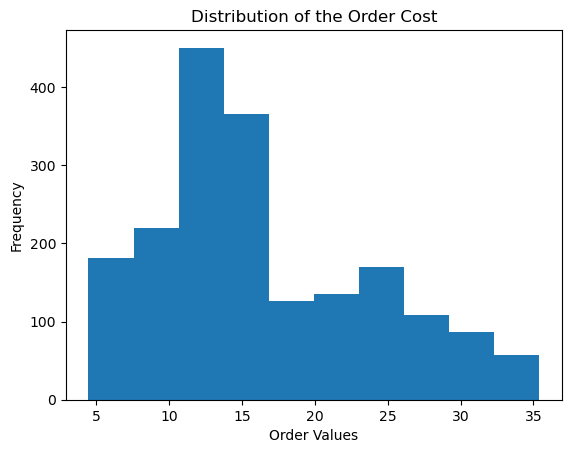

In [15]:
# Plotting the histogram
plt.hist(foodhub_df['cost_of_the_order'])

# Adding labels and title
plt.xlabel('Order Values')
plt.ylabel('Frequency')
plt.title('Distribution of the Order Cost')

# Display the chart
plt.show()

__the distruibution of the orders in dollars is skewed to the right with most of the orders costing between 10-15 dollars__ 

#### Day of the week

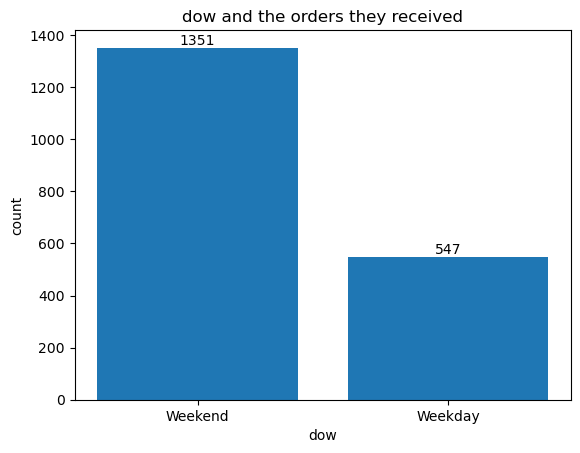

In [16]:
dow= foodhub_df['day_of_the_week'].value_counts()
dow
#visualize it
plt.bar(dow.index,dow.values)
plt.xlabel('dow')
plt.ylabel('count')
plt.title('dow and the orders they received')

#to add data labels
for a, b in enumerate(dow.values):
    plt.text(a, b, str(b), ha='center', va='bottom')

__Most of the orders were placed during the weekends__

#### Rating

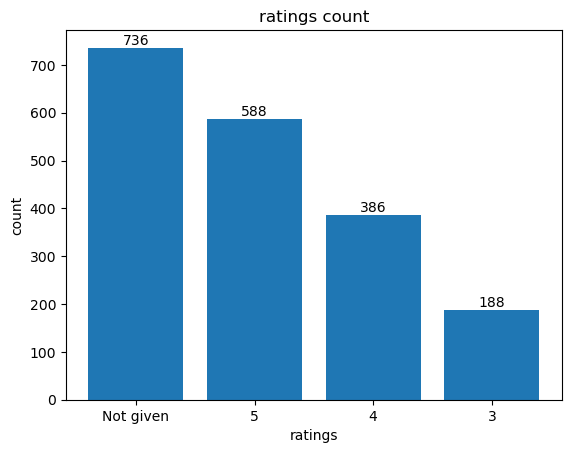

In [17]:
rating=foodhub_df['rating'].value_counts()
#visualize it
plt.bar(rating.index,rating.values)
plt.xlabel('ratings')
plt.ylabel('count')
plt.title('ratings count')

#to add data labels
for a, b in enumerate(rating.values):
    plt.text(a, b, str(b), ha='center', va='bottom')

__700+ customers didnt bother to give a rating__

#### Food Preparation time

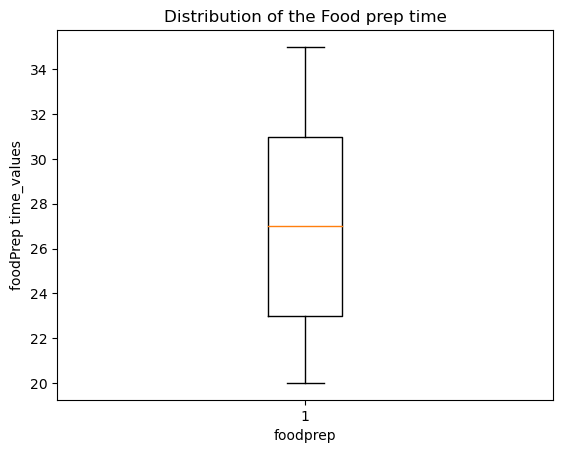

In [42]:
plt.boxplot(foodhub_df['food_preparation_time']);

# Adding labels and title
plt.xlabel('foodprep')
plt.ylabel('foodPrep time_values')
plt.title('Distribution of the Food prep time')

# Display the chart
plt.show()

__foods generally take between 20-30 minutes to be prepared__

#### Delivery time

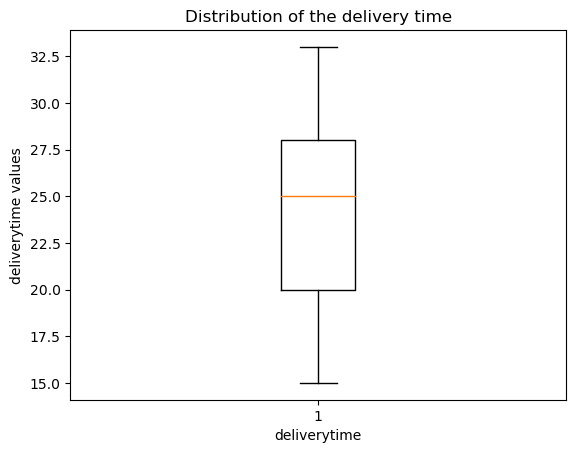

In [19]:
plt.boxplot(foodhub_df['delivery_time']);

# Adding labels and title
plt.xlabel('deliverytime')
plt.ylabel('deliverytime values')
plt.title('Distribution of the delivery time')

# Display the chart
plt.show()

__22-27 mins for food to be delivered__

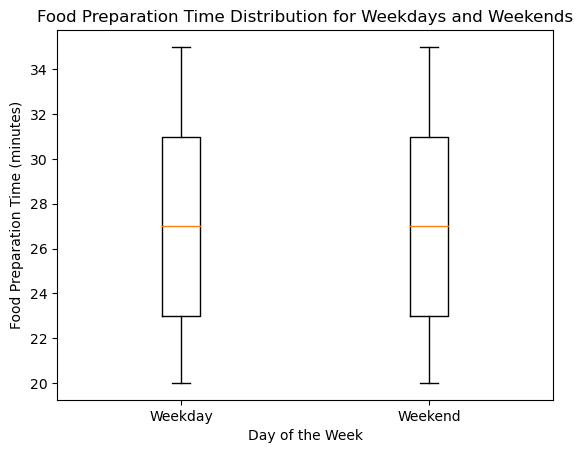

In [44]:
# Group the data by 'day_of_the_week'
grouped = foodhub_df.groupby('day_of_the_week')

# Create subplots for each group
fig, ax = plt.subplots()

# Plot a boxplot for each group
ax.boxplot([group['food_preparation_time'] for name, group in grouped])

# Set x-axis labels
ax.set_xticklabels(grouped.groups.keys())

# Set labels and title
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Food Preparation Time (minutes)')
ax.set_title('Food Preparation Time Distribution for Weekdays and Weekends')

# Show the plot
plt.show()


__Takes almost the same amount of time for food to be prepared on both weekends and weekdays__

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? 

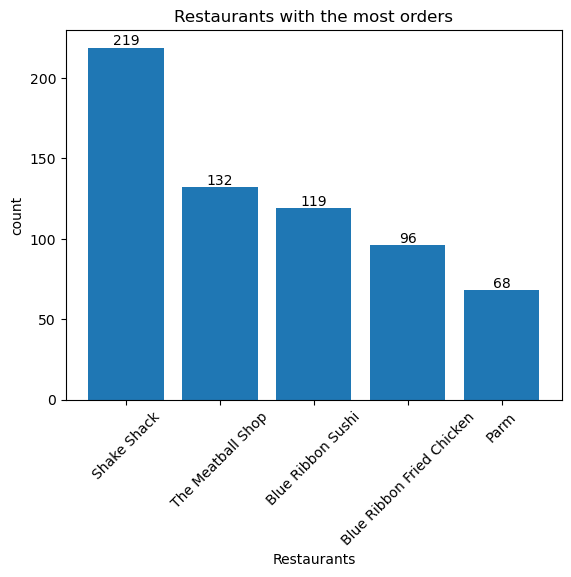

In [21]:
#restaurants with the most orders
Top_5_restaurants= foodhub_df['restaurant_name'].value_counts().head(5)

#Barchart to visualize the data
plt.bar(Top_5_restaurants.index,Top_5_restaurants.values)

# Set labels and title
plt.xlabel('Restaurants')
plt.ylabel('count')
plt.title('Restaurants with the most orders')
plt.xticks(rotation=45)

#to add data labels
for a, b in enumerate(Top_5_restaurants.values):
    plt.text(a, b, str(b), ha='center', va='bottom')

# Show the barchart
plt.show()

__Shake shack__ is the winner with over 200 orders, next is the __Meatball shop__ which is a little bit over half of the orders Shake Shack gets

### **Question 8**: Which is the most popular cuisine on weekends?

In [22]:
# Filter the DataFrame to retrieve rows where 'day_of_the_week' is 'Weekend'
weekend_orders = foodhub_df[foodhub_df['day_of_the_week'] == 'Weekend']

# Count the occurrences of each cuisine type within the filtered DataFrame
cuisine_counts = weekend_orders['cuisine_type'].value_counts()

# Retrieve the cuisine type with the highest count (most popular)
popular_weekend_cuisine = cuisine_counts.idxmax()

# Print the most popular cuisine on weekends
print('The most popular cuisine on weekends is:', popular_weekend_cuisine)


The most popular cuisine on weekends is: American


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [23]:
# Filter the DataFrame to retrieve rows where the 'cost_of_the_order' is greater than or equal to 20
orders_gt_20 = foodhub_df[foodhub_df['cost_of_the_order'] >= 20]['cost_of_the_order'].sum()

# Calculate the sum of the 'cost_of_the_order' column for all orders
total_orders = foodhub_df['cost_of_the_order'].sum()

# Calculate the percentage of orders with cost greater than or equal to 20
percent = orders_gt_20 / total_orders * 100

# Format the percentage value to two decimal places with a '%' symbol
percentage = '{:.2f}%'.format(percent)

# Print the calculated percentage
print(percentage)


47.12%


### **Question 10**: What is the mean order delivery time?

In [24]:
# Calculate the mean delivery time and round it to two decimal places
mean_deliv_time = round(foodhub_df['delivery_time'].mean(), 2)

# Print the mean delivery time in minutes
print(mean_deliv_time, 'mins')

24.16 mins


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [25]:
# Group the DataFrame by 'customer_id'
top_3_customers = foodhub_df.groupby('customer_id')

# Calculate the count of orders for each customer and sort the values in descending order
order_counts = top_3_customers['order_id'].count().sort_values(ascending=False)

# Retrieve the top 3 customers with the highest order counts
top_3_customers = order_counts.head(3)

# Print the top 3 customers
print(top_3_customers)


customer_id
52832    13
47440    10
83287     9
Name: order_id, dtype: int64


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

##### Cuisine vs Cost of the order

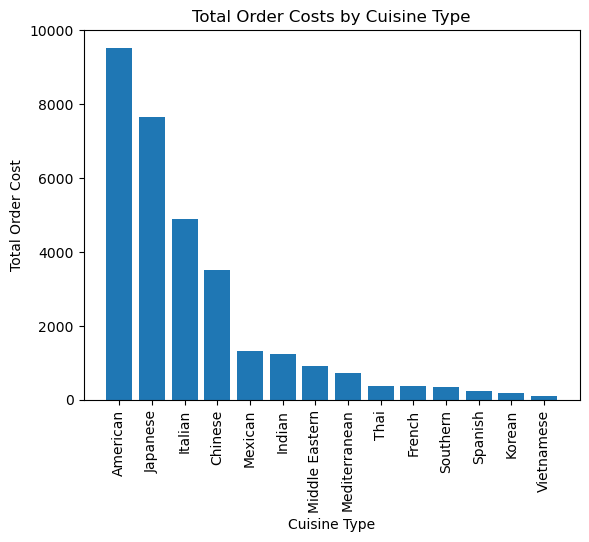

In [26]:
# Group the DataFrame by 'cuisine_type'
cuisine_grp = foodhub_df.groupby('cuisine_type')

# Calculate the sum of 'cost_of_the_order' for each cuisine type and sort the values in descending order
sorted_cuisine_grp = cuisine_grp['cost_of_the_order'].sum().sort_values(ascending=False)

# Create a bar plot using the sorted cuisine groups
plt.bar(sorted_cuisine_grp.index, sorted_cuisine_grp.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Set the title and labels for the plot
plt.title('Total Order Costs by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Total Order Cost')

# Display the plot
plt.show()

__American__ had a revenue of almost __1000dollars__ while  __Vietnamese__ couldnt make half of __2000dollars__

#### Cuisine vs Food Preparation time

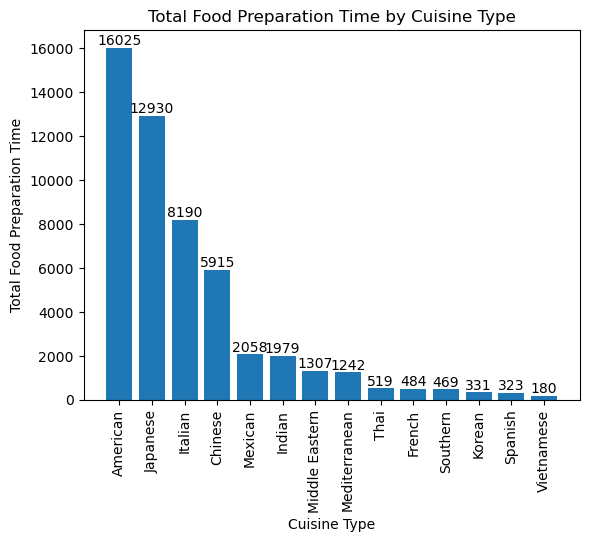

In [27]:
# Group the DataFrame by 'cuisine_type'
cui_aganist_fp_grp = foodhub_df.groupby('cuisine_type')

# Calculate the sum of 'food_preparation_time' for each cuisine type and sort the values in descending order
sorted_cui_aganist_fp_grp = cui_aganist_fp_grp['food_preparation_time'].sum().sort_values(ascending=False)

# Create a bar plot using the sorted cuisine groups
plt.bar(sorted_cui_aganist_fp_grp.index, sorted_cui_aganist_fp_grp.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

# Data labels
for i, value in enumerate(sorted_cui_aganist_fp_grp.values):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Set the title and labels for the plot
plt.title('Total Food Preparation Time by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Total Food Preparation Time')

# Display the plot
plt.show()

__American__ dishes cost about 1600+ minutes to be prepared

#### Day of the Week vs Delivery time

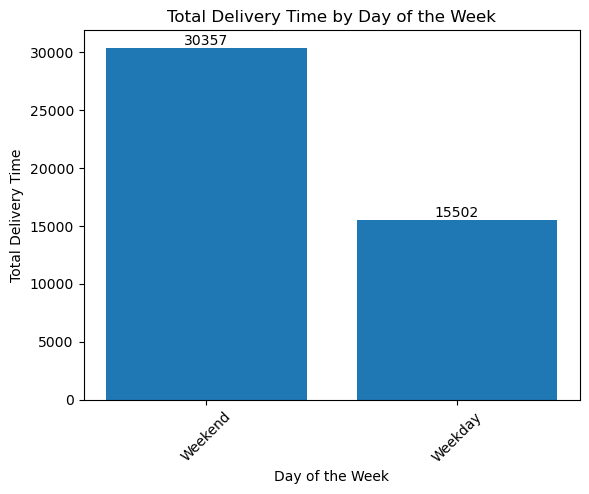

In [28]:
# Group the DataFrame by 'day_of_the_week'
dow_aganist_deli_grp = foodhub_df.groupby('day_of_the_week')

# Calculate the sum of 'delivery_time' for each day of the week and sort the values in descending order
sorted_dow_aganist_deli_grp = dow_aganist_deli_grp['delivery_time'].sum().sort_values(ascending=False)

# Create a bar plot using the sorted day of the week groups
plt.bar(sorted_dow_aganist_deli_grp.index, sorted_dow_aganist_deli_grp.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Data labels
for i, value in enumerate(sorted_dow_aganist_deli_grp.values):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Set the title and labels for the plot
plt.title('Total Delivery Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Delivery Time')

# Display the plot
plt.show()


#### Day of the Week vs Food Preparation time

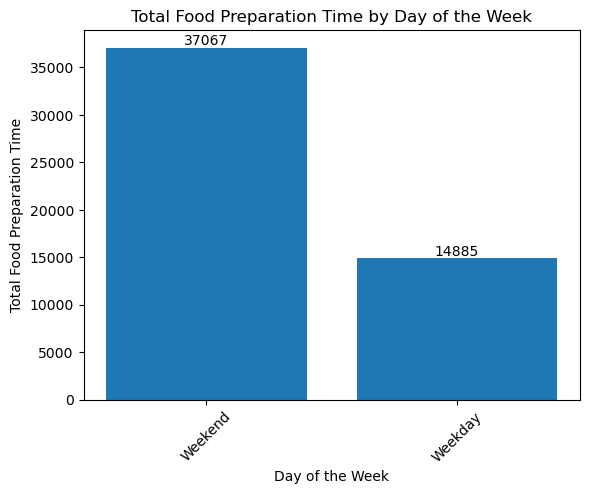

In [29]:
# Group the DataFrame by 'day_of_the_week'
dow_aganist_fp_grp = foodhub_df.groupby('day_of_the_week')

# Calculate the sum of 'food_preparation_time' for each day of the week and sort the values in descending order
sorted_dow_aganist_fp_grp = dow_aganist_fp_grp['food_preparation_time'].sum().sort_values(ascending=False)

# Create a bar plot using the sorted day of the week groups
plt.bar(sorted_dow_aganist_fp_grp.index, sorted_dow_aganist_fp_grp.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Data labels
for i, value in enumerate(sorted_dow_aganist_fp_grp.values):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Set the title and labels for the plot
plt.title('Total Food Preparation Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Food Preparation Time')

# Display the plot
plt.show()

#### Rating vs Delivery time

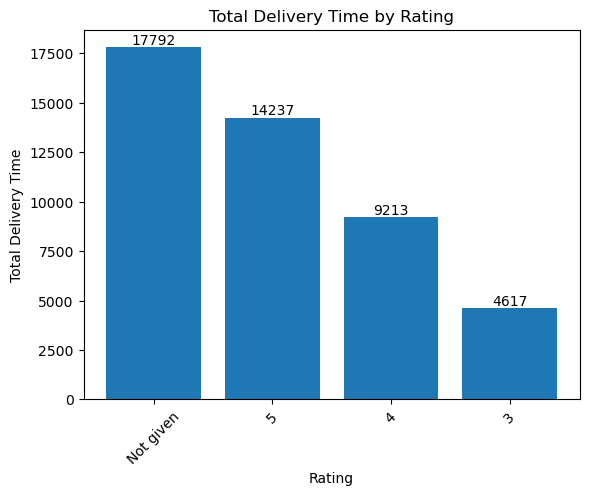

In [30]:
# Group the DataFrame by 'rating'
rate_aganist_deli_grp = foodhub_df.groupby('rating')

# Calculate the sum of 'delivery_time' for each rating category and sort the values in descending order
sorted_rate_aganist_deli_grp = rate_aganist_deli_grp['delivery_time'].sum().sort_values(ascending=False)

# Create a bar plot using the sorted rating groups
plt.bar(sorted_rate_aganist_deli_grp.index, sorted_rate_aganist_deli_grp.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Data labels
for i, value in enumerate(sorted_rate_aganist_deli_grp.values):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Set the title and labels for the plot
plt.title('Total Delivery Time by Rating')
plt.xlabel('Rating')
plt.ylabel('Total Delivery Time')

# Display the plot
plt.show()


#### Rating vs Cost of the order

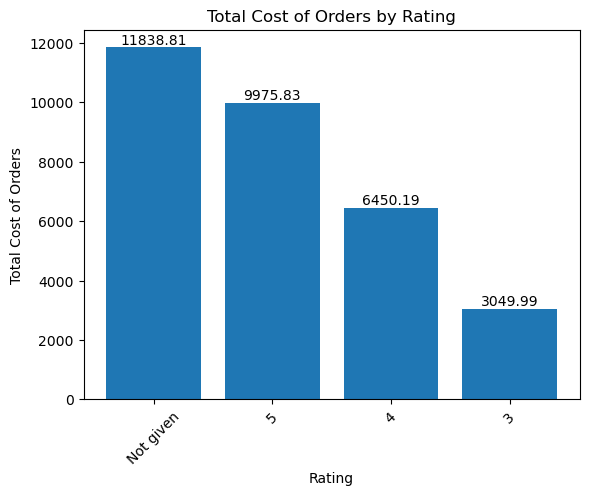

In [31]:
# Group the DataFrame by 'rating'
rate_aganist_coo_grp = foodhub_df.groupby('rating')

# Calculate the sum of 'cost_of_the_order' for each rating category and sort the values in descending order
sorted_rate_aganist_coo_grp = rate_aganist_coo_grp['cost_of_the_order'].sum().sort_values(ascending=False)

# Create a bar plot using the sorted rating groups
plt.bar(sorted_rate_aganist_coo_grp.index, sorted_rate_aganist_coo_grp.values)

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

# Data labels
for i, value in enumerate(sorted_rate_aganist_coo_grp.values):
    plt.text(i, value, str(round(value, 2)), ha='center', va='bottom')

# Set the title and labels for the plot
plt.title('Total Cost of Orders by Rating')
plt.xlabel('Rating')
plt.ylabel('Total Cost of Orders')

# Display the plot
plt.show()


#### Correlation among variables

Correlation coefficient: 0.041527472827744744


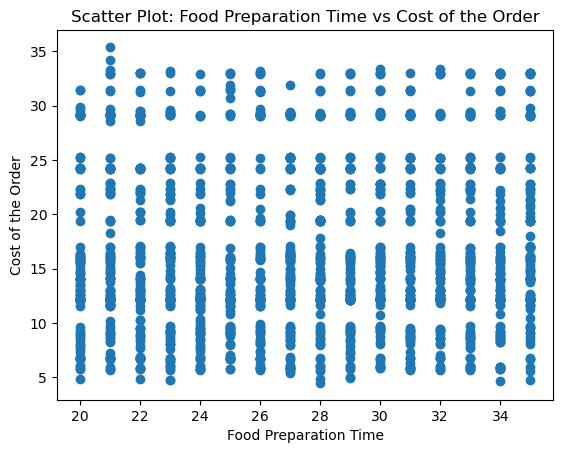

In [32]:
correlation = foodhub_df['cost_of_the_order'].corr(foodhub_df['food_preparation_time'])
print("Correlation coefficient:", correlation)

plt.scatter(foodhub_df['food_preparation_time'], foodhub_df['cost_of_the_order'])
plt.xlabel('Food Preparation Time')
plt.ylabel('Cost of the Order')
plt.title('Scatter Plot: Food Preparation Time vs Cost of the Order')
plt.show()


No correlation between the food preparation time and the cost of the order

Correlation coefficient: -0.02994918490064882


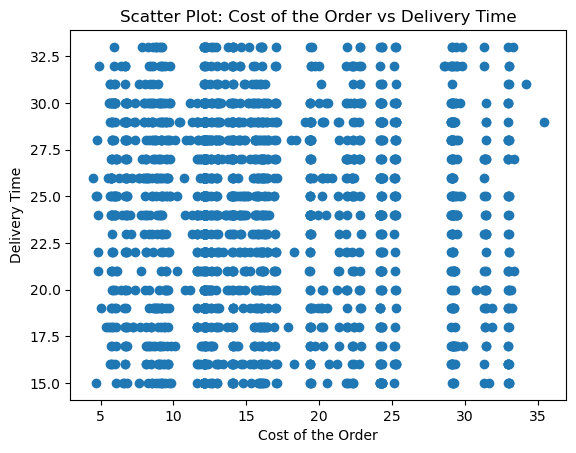

In [33]:
correlation = foodhub_df['cost_of_the_order'].corr(foodhub_df['delivery_time'])
print("Correlation coefficient:", correlation)

plt.scatter(foodhub_df['cost_of_the_order'], foodhub_df['delivery_time'])
plt.xlabel('Cost of the Order')
plt.ylabel('Delivery Time')
plt.title('Scatter Plot: Cost of the Order vs Delivery Time')
plt.show()

No Correlation between the cost of the order and the Delivery Time

In [34]:
correlation = foodhub_df['food_preparation_time'].corr(foodhub_df['delivery_time'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.01109428796208662


No correlation also between the food preparation time and the delivery time

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [48]:
# Group the DataFrame by 'restaurants'
restaurant_group = foodhub_df.groupby('restaurant_name')

# Calculate the count of ratings for each restaurant
rating_count = restaurant_group['rating'].count()

# Calculate the average rating for each restaurant and ignore those ratings not given
average_rating = restaurant_group['rating'].apply(lambda x: x[x != 'Not given'].astype(float).mean())

# Filter the restaurants based on the criteria
promotional_restaurants = rating_count[(rating_count > 50) & (average_rating > 4)]

# Print the restaurants fulfilling the criteria
print(promotional_restaurants.sort_values(ascending=False))


restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
RedFarm Broadway              59
RedFarm Hudson                55
Name: rating, dtype: int64


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [36]:
cost_4_25pct = 0  # variable to hold the cumulative value of 'individual 25_pct_cost'
cost_4_15pct = 0  # variable to hold the cumulative value of 'individual 15_pct_cost'

for cost in foodhub_df['cost_of_the_order']:
    if cost > 20:
        cost_pct = 0.25 * cost
        cost_4_25pct += cost_pct  # Accumulate the value of 'cost_pct' for each order
        
    if 5 < cost <= 20:
        cost_15_pct = 0.15 * cost
        cost_4_15pct += cost_15_pct  # Accumulate the value of 'cost_15_pct' for each order

total_cost = cost_4_25pct + cost_4_15pct
dols='${:.2f}'.format(total_cost)
dols

'$6166.30'

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [37]:
total_time_to_prep_and_deliver = foodhub_df['food_preparation_time'] + foodhub_df['delivery_time']
# Calculate the total time to prepare and deliver for each order

sum_of_ttime = total_time_to_prep_and_deliver.values.sum()
# Calculate the sum of all the values in the total_time_to_prep_and_deliver Series

variable_to_hold_the_values = 0
# Initialize a variable to accumulate the values that exceed 60

for t in total_time_to_prep_and_deliver.values:
    if t > 60:
        variable_to_hold_the_values += t
# Iterate over each value in the total_time_to_prep_and_deliver Series
# If a value is greater than 60, add it to the variable_to_hold_the_values

pct_of_orders_more_than_60mins = variable_to_hold_the_values / sum_of_ttime
# Calculate the percentage of orders that have a total time exceeding 60 minutes


print('{:.2f}%'.format(round(pct_of_orders_more_than_60mins * 100, 2)))
# Print the percentage as a formatted string with two decimal places


12.89%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [38]:
# Group the data by 'day_of_the_week' and calculate the mean delivery time
mean_delivery_time_by_day = foodhub_df.groupby('day_of_the_week')['delivery_time'].mean()

# Print the mean delivery time for weekdays and weekends
print(mean_delivery_time_by_day)

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


The Mean of the delivery time on weekdays is greater than that of weekends.
This means that, on average, individual deliveries on weekdays tend to take longer compared to individual deliveries on weekends. Even though the total time spent on deliveries may be lower on weekdays, the average delivery time is higher. This could be due to factors such as __heavier traffic or higher demand during weekdays, leading to potential delays in delivery__.

In [ ]:
# Group the data by 'dayoftheweek'
grouped = foodhub_df.groupby('day_of_the_week')

# Create subplots for each group
fig, ax = plt.subplots()

# Plot a histogram for each group
for name, group in grouped:
    ax.hist(group['delivery_time'], label=name, alpha=0.5)

# Set labels and title
ax.set_xlabel('Delivery Time')
ax.set_ylabel('Frequency')
ax.set_title('Delivery Time Distribution for Weekdays and Weekends')

# Add a legend
ax.legend()

# Show the plot
plt.show()


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

Restuarants should look into the __'French', 'Southern', 'Korean', 'Spanish', 'Vietnamese' dishes__ as they were ordered the least (Maybe something to do with the preparation?). Also, Not much can be said about the ratings because 700+ customers didnt bother to give ratings. maybe __incentives__ should be given to encourage customers to give ratings